# HW option 2
* 0- Remove duplicated data
* 1- Use Standrdization
* 2- Skewed
* 3- Corr   
* 4- Nulls

In [76]:
import pandas as pd
import numpy as np 

import seaborn as sb 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler    #mean norm (x-mean)/std   2/3 of data in range -1 to 1 and mean =0
from sklearn.preprocessing import MinMaxScaler      #range from 0 to 1

In [77]:
housing = pd.read_csv("D:\Engineering\IBM_Data_Scientist\Lectures\Lec26\lec19 extra friday\Ames_Housing_Data1.tsv", sep='\t')
housing

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
6,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
7,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
8,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
9,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500


# 0- Remove Duplicated Data

In [78]:
housing = housing.drop_duplicates()
housing.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


# 1- Standardize the Data (using StandardScaler)

In [79]:
# Get the numerical data only from housing DataFrame
housing_numerical = housing.select_dtypes(include= ['float64', 'int64'])
housing_numerical.head()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,...,210,62,0,0,0,0,0,5,2010,215000
2,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,...,140,0,0,0,120,0,0,6,2010,105000
3,3,526351010,20,81.0,14267,6,6,1958,1958,108.0,...,393,36,0,0,0,0,12500,6,2010,172000
4,4,526353030,20,93.0,11160,7,5,1968,1968,0.0,...,0,0,0,0,0,0,0,4,2010,244000
5,5,527105010,60,74.0,13830,5,5,1997,1998,0.0,...,212,34,0,0,0,0,0,3,2010,189900


In [80]:
# Standardize the numerical data in the DataFrame
housing_standard = housing.copy()
housing_standard[housing_numerical.columns] = StandardScaler().fit_transform(housing_standard[housing_numerical.columns])
housing_standard

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,-1.731460,-0.997164,-0.877005,RL,3.072506,2.744381,Pave,NaN,IR1,Lvl,...,-0.063031,NaN,NaN,NaN,-0.089422,-0.448057,1.678499,WD,Normal,0.428229
2,-1.730277,-0.996904,-0.877005,RH,0.461265,0.187097,Pave,NaN,Reg,Lvl,...,-0.063031,NaN,MnPrv,NaN,-0.089422,-0.079602,1.678499,WD,Normal,-0.948957
3,-1.729095,-0.996899,-0.877005,RL,0.504073,0.522814,Pave,NaN,IR1,Lvl,...,-0.063031,NaN,NaN,Gar2,21.985725,-0.079602,1.678499,WD,Normal,-0.110125
4,-1.727913,-0.996888,-0.877005,RL,1.017759,0.128458,Pave,NaN,Reg,Lvl,...,-0.063031,NaN,NaN,NaN,-0.089422,-0.816513,1.678499,WD,Normal,0.791305
5,-1.726731,-0.992903,0.061285,RL,0.204422,0.467348,Pave,NaN,IR1,Lvl,...,-0.063031,NaN,MnPrv,NaN,-0.089422,-1.184969,1.678499,WD,Normal,0.113980
6,-1.725548,-0.992903,0.061285,RL,0.375651,-0.021567,Pave,NaN,IR1,Lvl,...,-0.063031,NaN,NaN,NaN,-0.089422,-0.079602,1.678499,WD,Normal,0.184091
7,-1.724366,-0.992786,1.468720,RL,-1.208216,-0.663554,Pave,NaN,Reg,Lvl,...,-0.063031,NaN,NaN,NaN,-0.089422,-0.816513,1.678499,WD,Normal,0.409449
8,-1.723184,-0.992691,1.468720,RL,-1.122602,-0.652765,Pave,NaN,IR1,HLS,...,-0.063031,NaN,NaN,NaN,-0.089422,-1.921881,1.678499,WD,Normal,0.134012
9,-1.722001,-0.992686,1.468720,RL,-1.293831,-0.604026,Pave,NaN,IR1,Lvl,...,-0.063031,NaN,NaN,NaN,-0.089422,-1.184969,1.678499,WD,Normal,0.697406
10,-1.720819,-0.992601,0.061285,RL,-0.394879,-0.336087,Pave,NaN,Reg,Lvl,...,-0.063031,NaN,NaN,NaN,-0.089422,-0.079602,1.678499,WD,Normal,0.102712


# 2- Handling Null Values Before SHowing Skewness

In [81]:
housing_standard[housing_numerical.columns].isnull().sum()

Order                0
PID                  0
MS SubClass          0
Lot Frontage       490
Lot Area             0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Mas Vnr Area        23
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       2
Bsmt Half Bath       2
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Yr Blt      159
Garage Cars          1
Garage Area          1
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold              0
SalePrice            0
dtype: int64

In [82]:
# Replace nan values with mean of its column

for column in housing_numerical.columns:
    mean = housing_standard[column].mean()
    housing_standard[column].fillna(mean, inplace=True)

housing_standard[housing_numerical.columns].isnull().sum()

Order              0
PID                0
MS SubClass        0
Lot Frontage       0
Lot Area           0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Mas Vnr Area       0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Yr Blt      0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
Mo Sold            0
Yr Sold            0
SalePrice          0
dtype: int64

# 3- Handle the Skewed Data

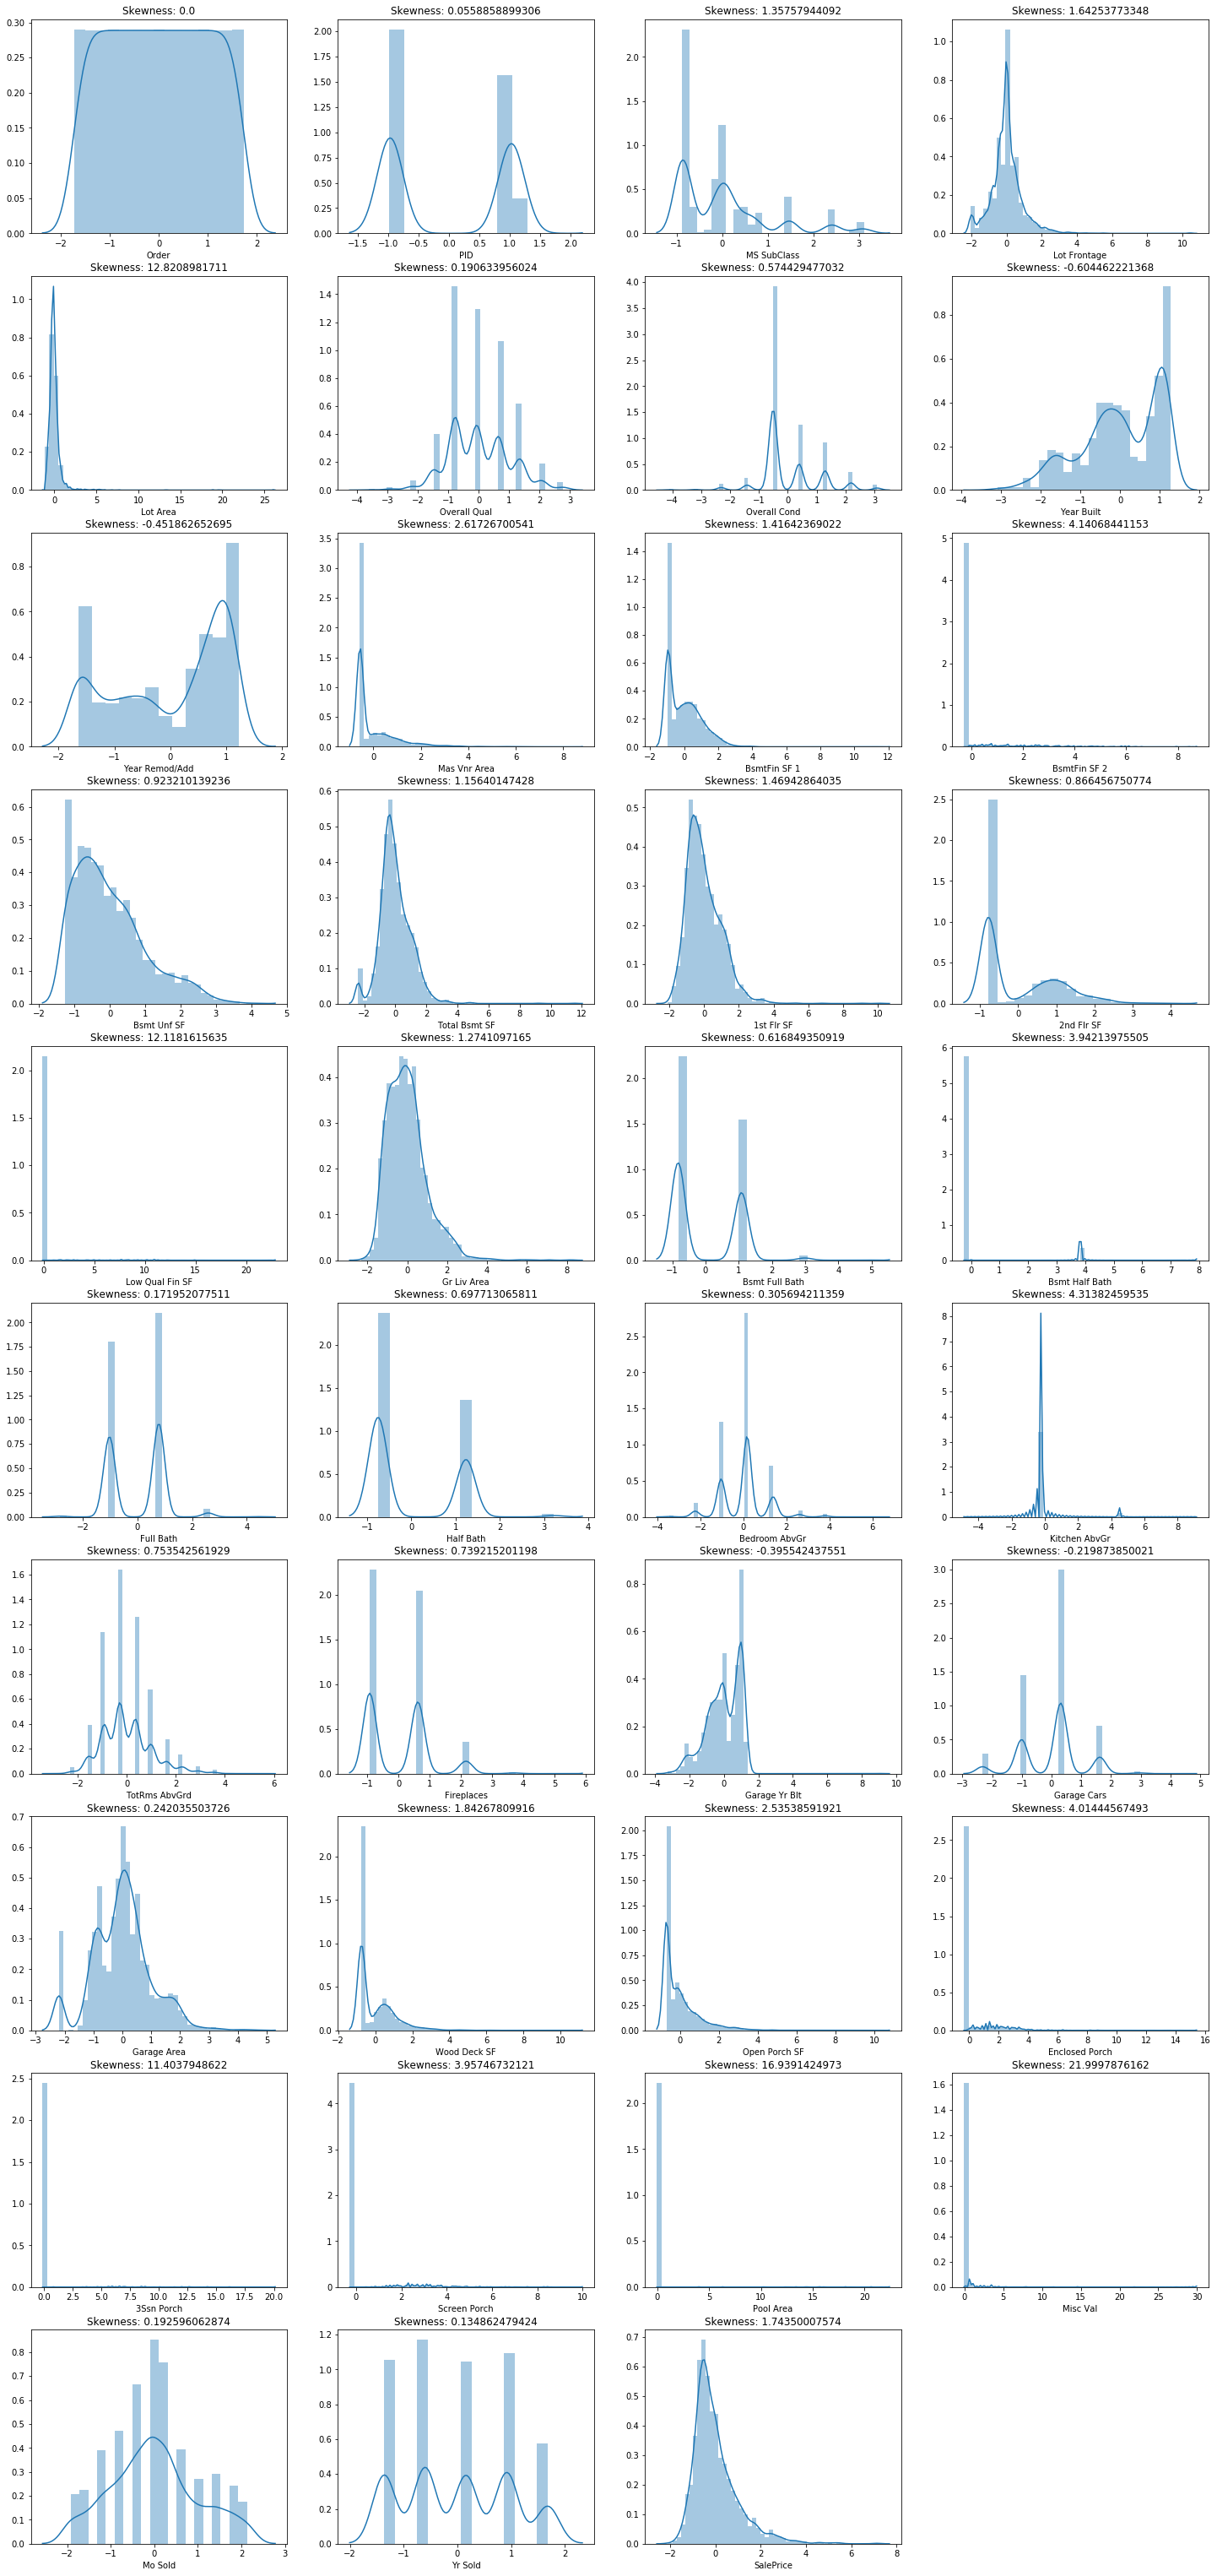

In [84]:
# First Visualize all Numerical Columns to See Skewness
plt.figure(figsize=[25, 55])
for i in range(0, len(housing_numerical.columns)):
    plt.subplot(10, 4, i+1)
    sb.distplot(housing_standard[housing_numerical.columns[i]])
    plt.title("Skewness: " + str(housing_standard[housing_numerical.columns[i]].skew()))
    

c:\ProgramData\anaconda3\envs\Abdo_Halem\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log1p
  import sys


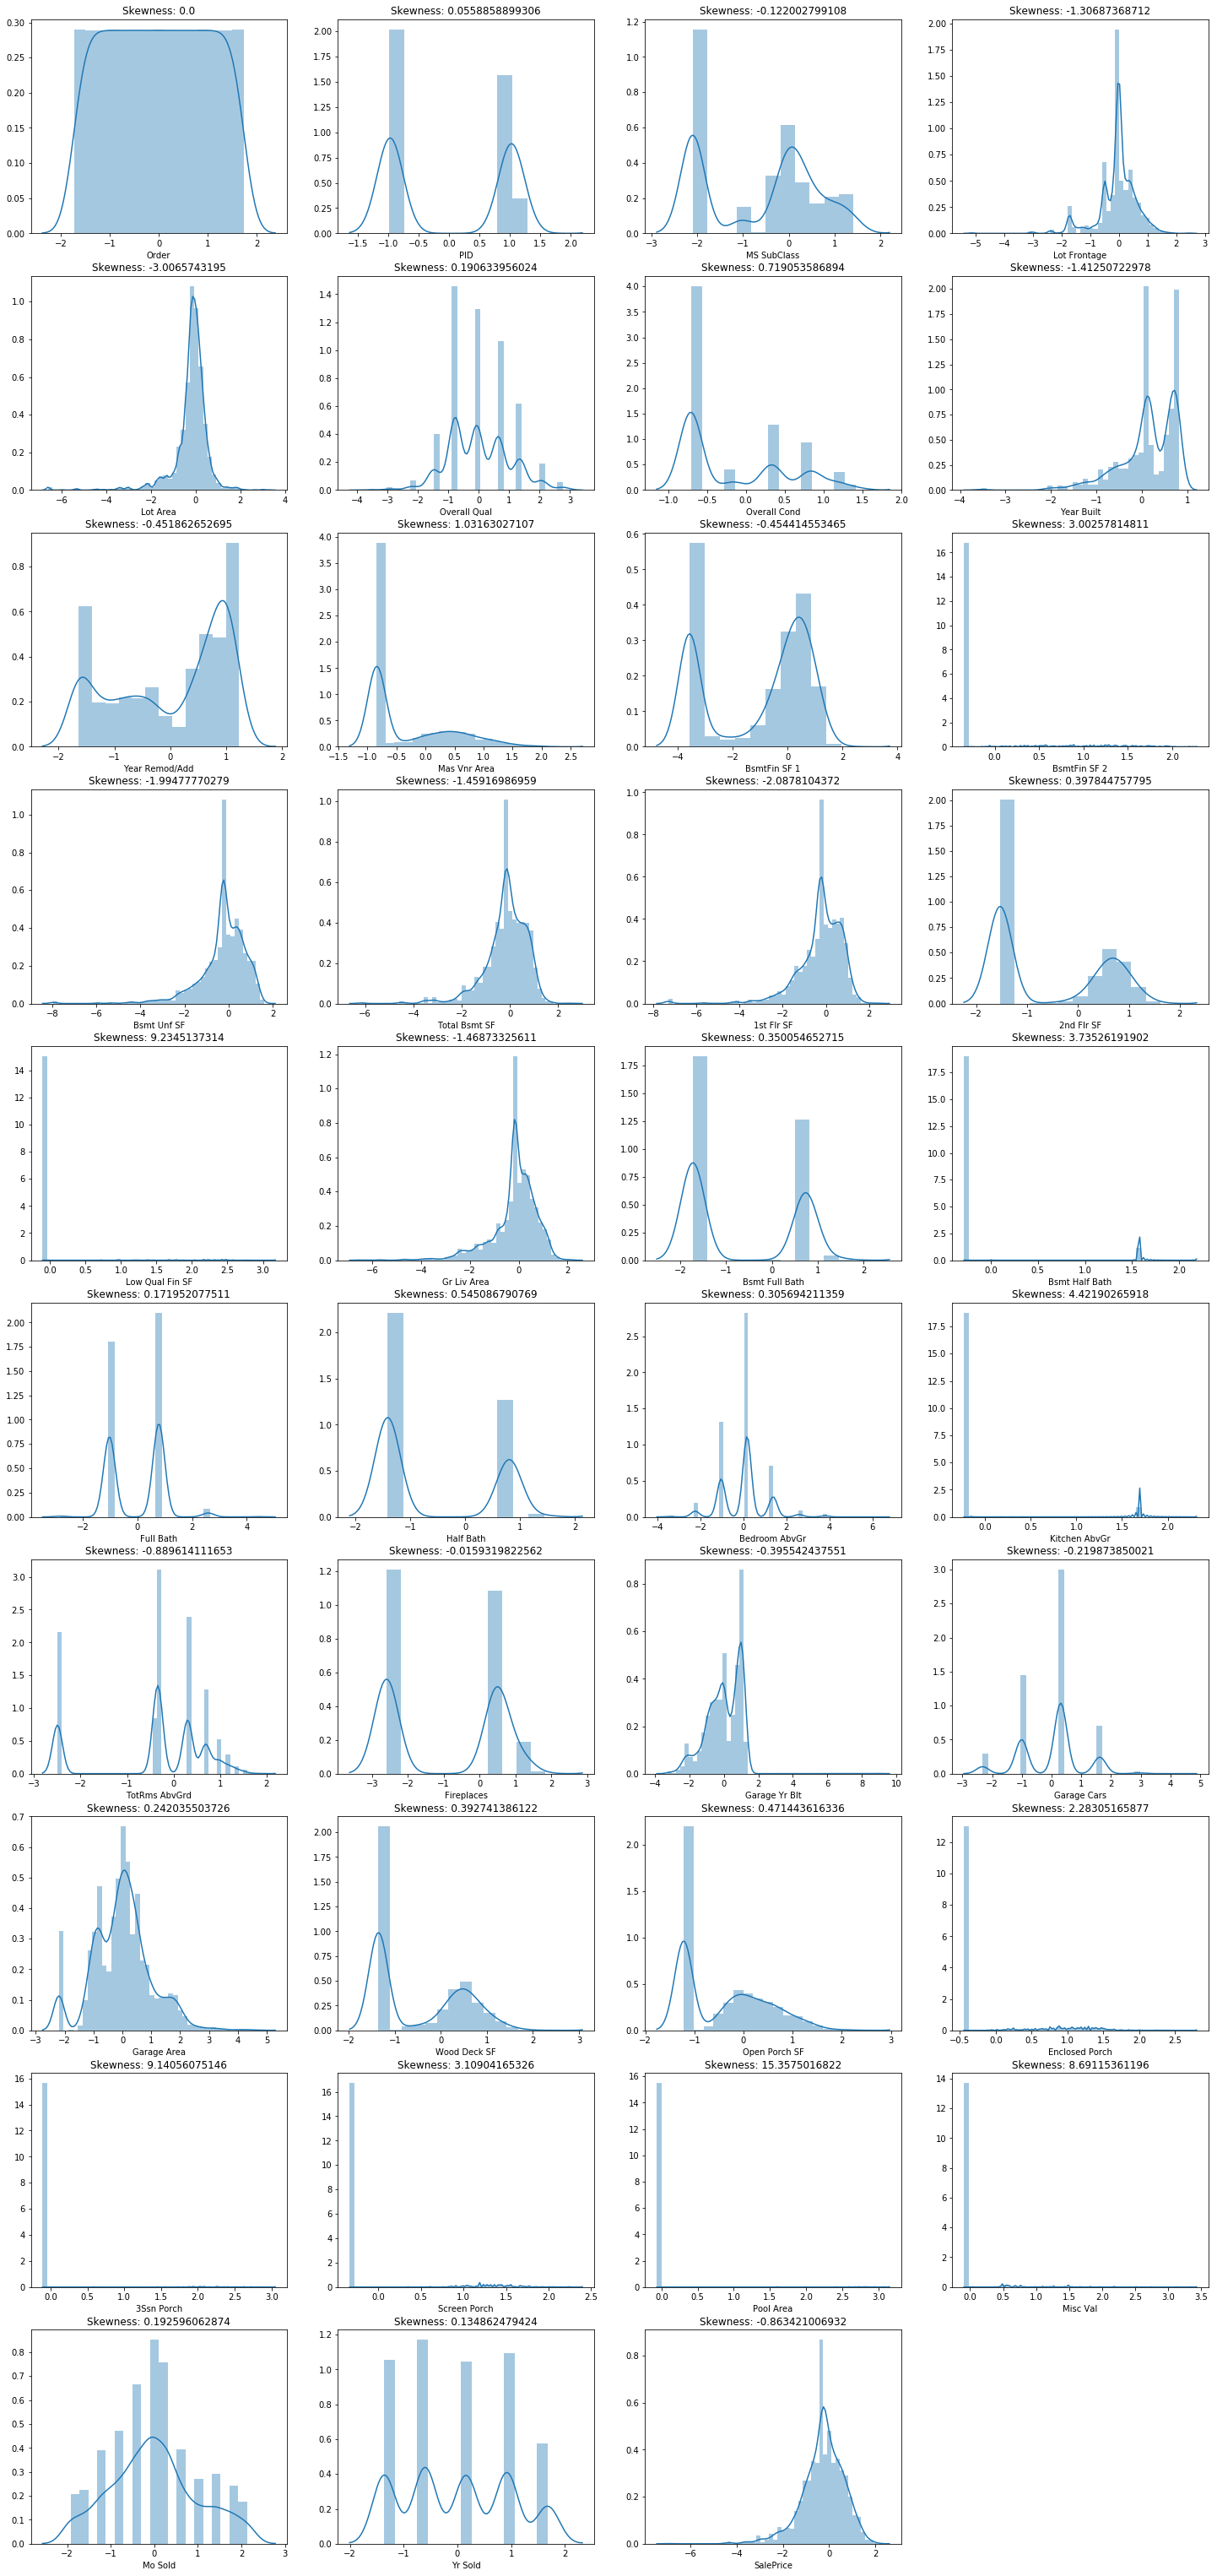

In [85]:
# Use log tranform to reduce the skewness of the data
plt.figure(figsize=[25,55])
i = 1
for column in housing_numerical.columns:
    plt.subplot(10, 4, i); i += 1
    if(abs(housing_standard[column].skew()) > 0.5):
        housing_standard[column] = np.log1p(housing_standard[column])                   # Use log(x+1) to take log(x=0) without errors
        housing_standard[column].fillna(housing_standard[column].mean(), inplace=True)  # fill nan values again because taking log(-ve) results in nan values 
    sb.distplot(housing_standard[column])
    plt.title("Skewness: " + str(housing_standard[column].skew()))

# 2- Get Correlation Between Each Numerical Column and 'SalePrice' Column

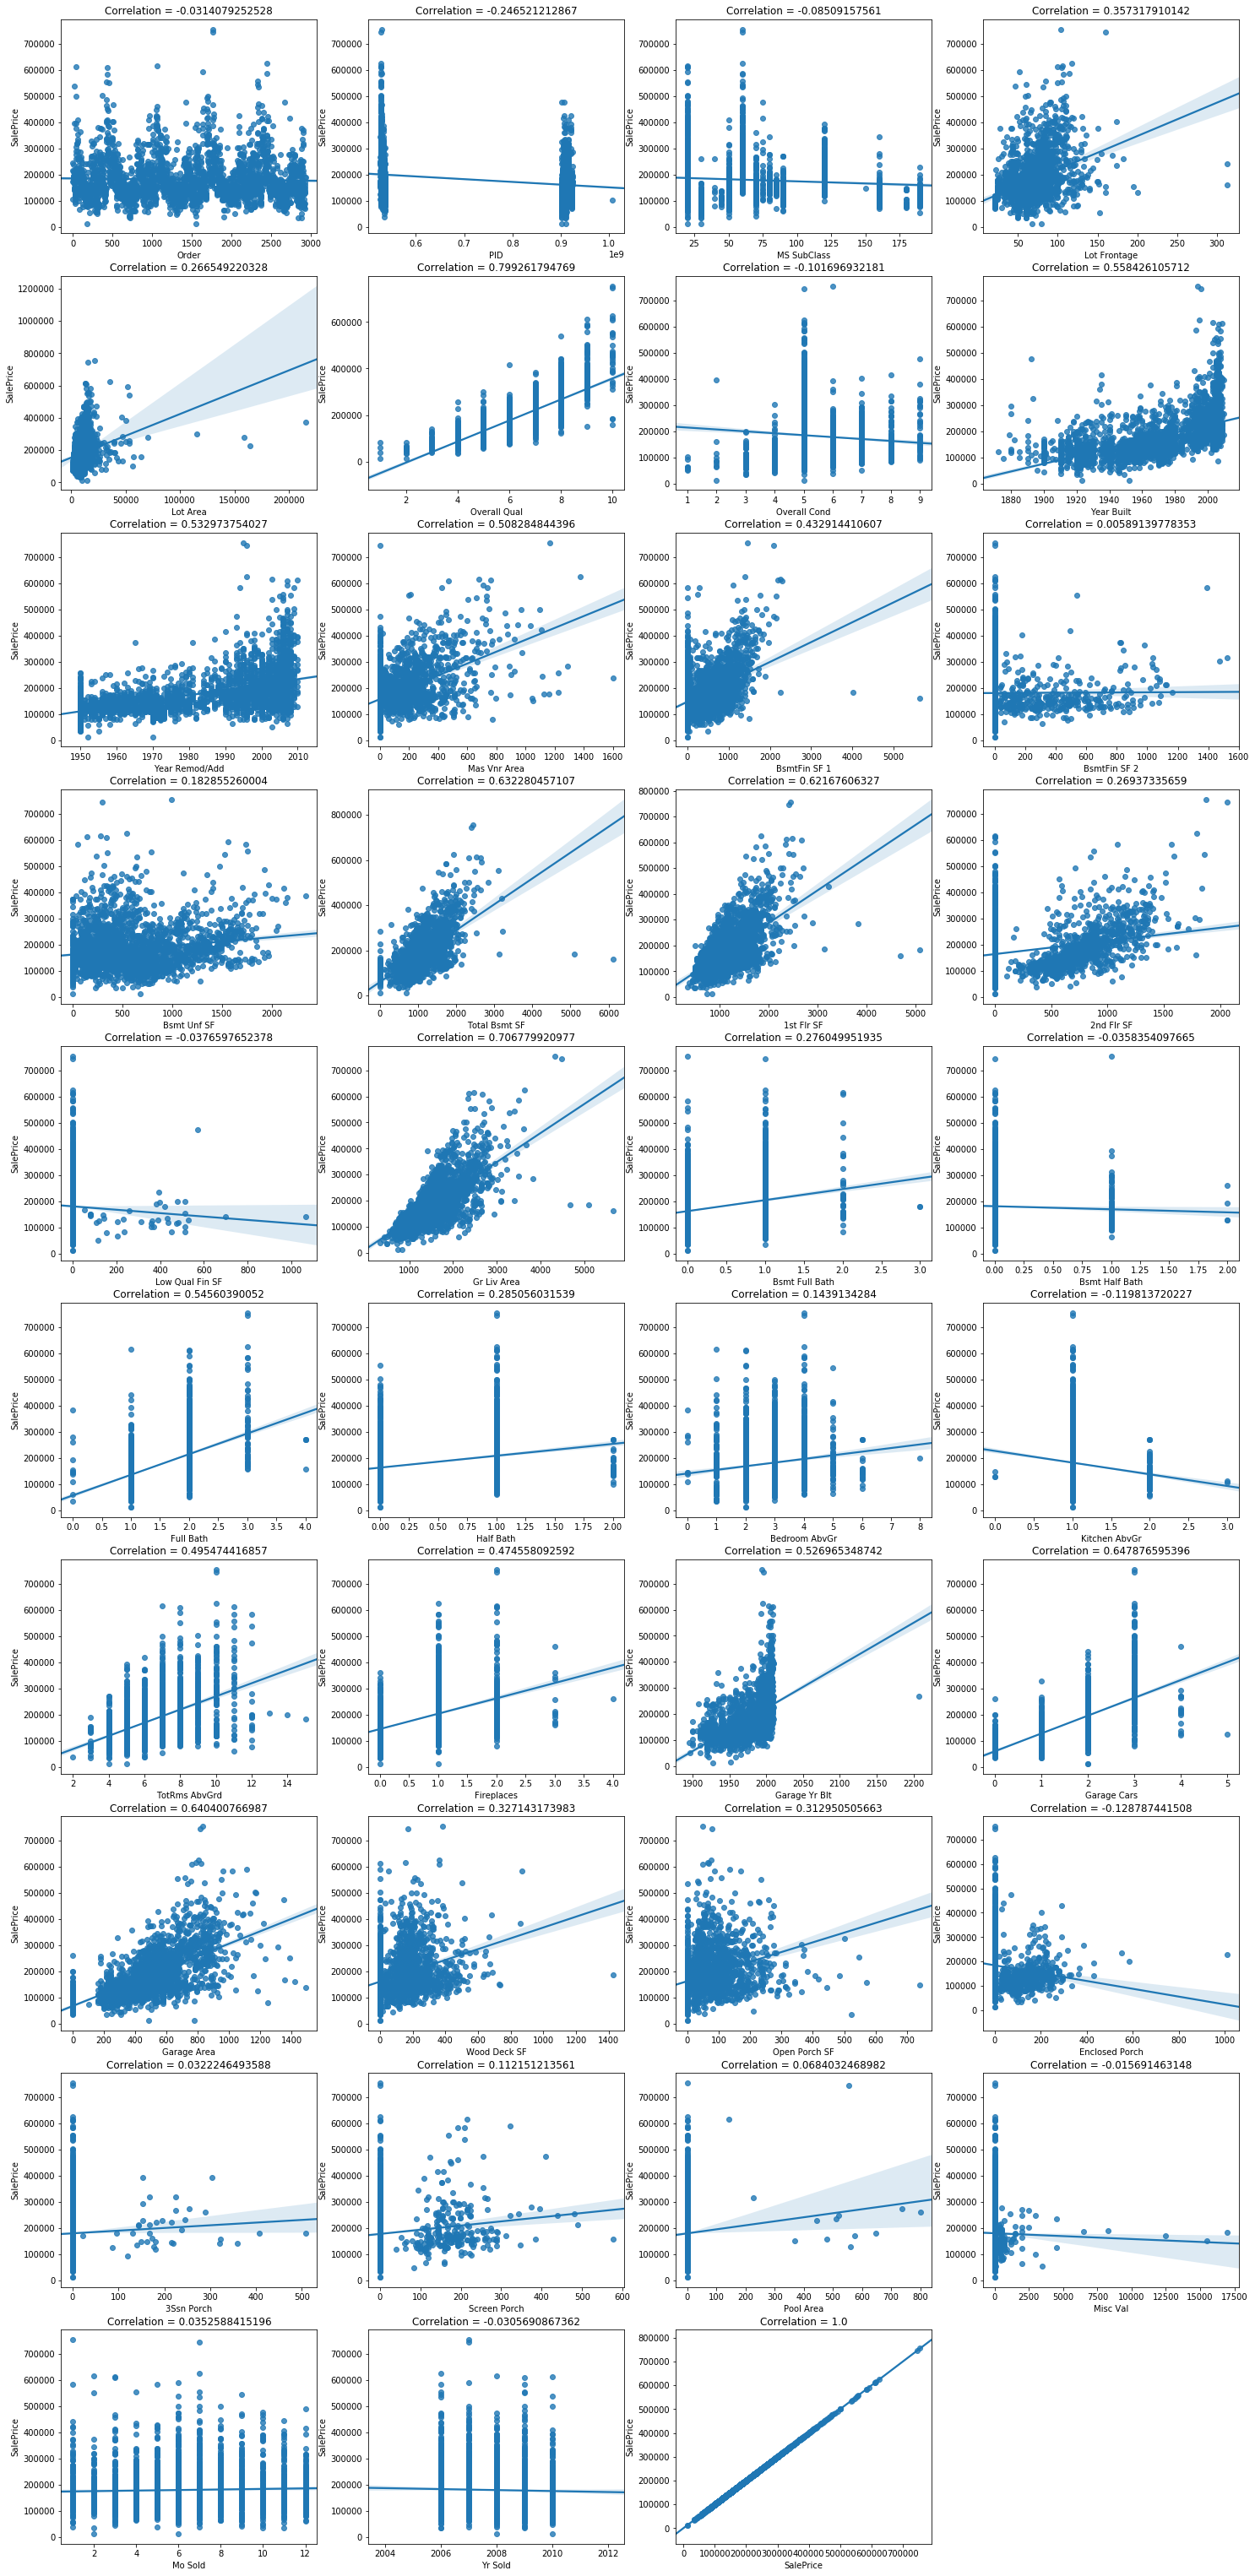

In [101]:
plt.figure(figsize = [25, 55])
i = 1
housing_numerical_corr = housing_numerical.corr()['SalePrice']
for column in housing_numerical.columns: #range 0 to 38
    plt.subplot(10, 4, i); i += 1
    sb.regplot(data = housing_numerical, x = column, y = 'SalePrice');
    plt.xlabel(column);
    plt.ylabel('SalePrice');
    plt.title("Correlation = " + str(housing_numerical_corr[column]))

In [99]:
# Calculate corelation between every column and 'SalePrice' column
housing_numerical_corr = housing_numerical.corr()['SalePrice']
housing_numerical_corr


Order             -0.031408
PID               -0.246521
MS SubClass       -0.085092
Lot Frontage       0.357318
Lot Area           0.266549
Overall Qual       0.799262
Overall Cond      -0.101697
Year Built         0.558426
Year Remod/Add     0.532974
Mas Vnr Area       0.508285
BsmtFin SF 1       0.432914
BsmtFin SF 2       0.005891
Bsmt Unf SF        0.182855
Total Bsmt SF      0.632280
1st Flr SF         0.621676
2nd Flr SF         0.269373
Low Qual Fin SF   -0.037660
Gr Liv Area        0.706780
Bsmt Full Bath     0.276050
Bsmt Half Bath    -0.035835
Full Bath          0.545604
Half Bath          0.285056
Bedroom AbvGr      0.143913
Kitchen AbvGr     -0.119814
TotRms AbvGrd      0.495474
Fireplaces         0.474558
Garage Yr Blt      0.526965
Garage Cars        0.647877
Garage Area        0.640401
Wood Deck SF       0.327143
Open Porch SF      0.312951
Enclosed Porch    -0.128787
3Ssn Porch         0.032225
Screen Porch       0.112151
Pool Area          0.068403
Misc Val          -0

In [102]:
high_corr_features = housing_numerical_corr[abs(housing_numerical_corr) > 0.5].sort_values(ascending=False)
high_corr_features

SalePrice         1.000000
Overall Qual      0.799262
Gr Liv Area       0.706780
Garage Cars       0.647877
Garage Area       0.640401
Total Bsmt SF     0.632280
1st Flr SF        0.621676
Year Built        0.558426
Full Bath         0.545604
Year Remod/Add    0.532974
Garage Yr Blt     0.526965
Mas Vnr Area      0.508285
Name: SalePrice, dtype: float64

# 5- Handling Null Values in the Whole Dataset After Standardization and Handling Skewed Data

In [104]:
null_columns = housing_standard.isnull().sum().sort_values(ascending=False)[0:22]
null_columns

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Fireplace Qu      1422
Garage Finish      159
Garage Qual        159
Garage Cond        159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
BsmtFin Type 1      80
Bsmt Cond           80
Bsmt Qual           80
Mas Vnr Type        23
Electrical           1
Mas Vnr Area         0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Street               0
dtype: int64

In [109]:
# Drop first five columns in null_columns because they are useless as they have a huge number of null values
housing_standard = housing_standard.drop(null_columns.index[0:5], axis=1)
housing_standard.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,-1.731460,-0.997164,-2.09561,RL,1.404258,1.320256,Pave,IR1,Lvl,AllPub,...,-0.444473,-0.108849,-0.335969,-0.065105,-0.093676,-0.448057,1.678499,WD,Normal,0.356435
2,-1.730277,-0.996904,-2.09561,RH,0.379303,0.171511,Pave,Reg,Lvl,AllPub,...,-0.444473,-0.108849,1.048907,-0.065105,-0.093676,-0.079602,1.678499,WD,Normal,-2.975078
3,-1.729095,-0.996899,-2.09561,RL,0.408176,0.420560,Pave,IR1,Lvl,AllPub,...,-0.444473,-0.108849,-0.335969,-0.065105,3.134873,-0.079602,1.678499,WD,Normal,-0.116675
4,-1.727913,-0.996888,-2.09561,RL,0.701988,0.120852,Pave,Reg,Lvl,AllPub,...,-0.444473,-0.108849,-0.335969,-0.065105,-0.093676,-0.816513,1.678499,WD,Normal,0.582944
5,-1.726731,-0.992903,0.05948,RL,0.186000,0.383456,Pave,IR1,Lvl,AllPub,...,-0.444473,-0.108849,-0.335969,-0.065105,-0.093676,-1.184969,1.678499,WD,Normal,0.107939


In [112]:
null_columns = housing_standard.isnull().sum().sort_values(ascending=False)[0:11]
null_columns

Garage Finish     159
Garage Cond       159
Garage Qual       159
Garage Type       157
Bsmt Exposure      83
BsmtFin Type 2     81
BsmtFin Type 1     80
Bsmt Cond          80
Bsmt Qual          80
Mas Vnr Type       23
Electrical          1
dtype: int64

In [113]:
# We Replace nan numerical values with mean of its columns before show skewness, now we drop string nan values
for i in null_columns.index:
    housing_standard.dropna(subset=[i], inplace=True)
    

In [114]:
housing_standard.isnull().sum().sum()

0

In [115]:
# Housing data after preprocessing
housing_standard

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,-1.731460,-0.997164,-2.095610,RL,1.404258e+00,1.320256,Pave,IR1,Lvl,AllPub,...,-0.444473,-0.108849,-0.335969,-0.065105,-0.093676,-0.448057,1.678499,WD,Normal,0.356435
2,-1.730277,-0.996904,-2.095610,RH,3.793027e-01,0.171511,Pave,Reg,Lvl,AllPub,...,-0.444473,-0.108849,1.048907,-0.065105,-0.093676,-0.079602,1.678499,WD,Normal,-2.975078
3,-1.729095,-0.996899,-2.095610,RL,4.081765e-01,0.420560,Pave,IR1,Lvl,AllPub,...,-0.444473,-0.108849,-0.335969,-0.065105,3.134873,-0.079602,1.678499,WD,Normal,-0.116675
4,-1.727913,-0.996888,-2.095610,RL,7.019876e-01,0.120852,Pave,Reg,Lvl,AllPub,...,-0.444473,-0.108849,-0.335969,-0.065105,-0.093676,-0.816513,1.678499,WD,Normal,0.582944
5,-1.726731,-0.992903,0.059480,RL,1.859998e-01,0.383456,Pave,IR1,Lvl,AllPub,...,-0.444473,-0.108849,-0.335969,-0.065105,-0.093676,-1.184969,1.678499,WD,Normal,0.107939
6,-1.725548,-0.992903,0.059480,RL,3.189270e-01,-0.021803,Pave,IR1,Lvl,AllPub,...,-0.444473,-0.108849,-0.335969,-0.065105,-0.093676,-0.079602,1.678499,WD,Normal,0.168976
7,-1.724366,-0.992786,0.903700,RL,-5.238825e-02,-1.089316,Pave,Reg,Lvl,AllPub,...,1.191527,-0.108849,-0.335969,-0.065105,-0.093676,-0.816513,1.678499,WD,Normal,0.343199
8,-1.723184,-0.992691,0.903700,RL,-5.238825e-02,-1.057753,Pave,IR1,HLS,AllPub,...,-0.444473,-0.108849,1.188607,-0.065105,-0.093676,-1.921881,1.678499,WD,Normal,0.125762
9,-1.722001,-0.992686,0.903700,RL,-5.238825e-02,-0.926406,Pave,IR1,Lvl,AllPub,...,-0.444473,-0.108849,-0.335969,-0.065105,-0.093676,-1.184969,1.678499,WD,Normal,0.529101
10,-1.720819,-0.992601,0.059480,RL,-5.023269e-01,-0.409605,Pave,Reg,Lvl,AllPub,...,-0.444473,-0.108849,-0.335969,-0.065105,-0.093676,-0.079602,1.678499,WD,Normal,0.097773
